## YouTube Video Finder with Analysis

### Tools Used:
- Python (Jupyter Notebook)
- YouTube Data API v3
- Gemini 1.5 Flash (via Google Generative AI API)

### Objective:
Find and recommend the best YouTube video related to a student's search query using AI.

### Workflow Steps:
1. User inputs a query (e.g., “AI tools for students”).
2. The script uses the YouTube API to fetch the **top 20 relevant videos**:
    - Posted within the **last 14 days**
    - Between **4 and 20 minutes** long
3. Extracts and filters video data into a DataFrame.
4. Sends the video titles to **Gemini 1.5 Flash**.
5. Gemini analyzes the titles and returns the **most relevant one**.
6. The selected video title is displayed as the final recommendation.

### Result:
**Best Video Recommendation:**
`3. Top 9 AI Tools Every Student Needs to Succeed!`


In [1]:
import requests
import datetime
import pandas as pd
from googleapiclient.discovery import build
import google.generativeai as genai

In [2]:
API_KEY = 'your api key' 
youtube = build('youtube', 'v3', developerKey=API_KEY)

In [4]:
query = input("Enter your search query: ")
published_after = (datetime.datetime.now() - datetime.timedelta(days=14)).isoformat("T") + "Z"
request = youtube.search().list(
    part="snippet",
    q=query,
    type="video",
    maxResults=50,  
    publishedAfter=published_after
)
response = request.execute()
videos = []
for item in response['items']:
    video_id = item['id']['videoId']
    title = item['snippet']['title']
    channel = item['snippet']['channelTitle']
    publish_time = item['snippet']['publishedAt']
    details = youtube.videos().list(
        part="contentDetails,statistics",
        id=video_id
    ).execute()
    duration = details['items'][0]['contentDetails']['duration']
    import isodate
    duration_sec = isodate.parse_duration(duration).total_seconds()
    duration_min = duration_sec / 60
    if 4 <= duration_min <= 20:
        videos.append({
            "Title": title,
            "Channel": channel,
            "Published Time": publish_time,
            "Duration (min)": round(duration_min, 2),
            "Video URL": f"https://www.youtube.com/watch?v={video_id}"
        })
df = pd.DataFrame(videos)
df = df.head(20)
df

Enter your search query:  AI tools for students


,Title,Channel,Published Time,Duration (min),Video URL
0,Top 10 Free AI Tools Every Student Needs,Mystory Tv,2025-06-17T17:29:10Z,4.10,https://www.youtube.com/watch?v=juWKA37j8rM
1,Many students want to learn to use AI responsi...,The Transmitter,2025-06-23T04:09:56Z,8.40,https://www.youtube.com/watch?v=2aP_7xbr8tc
2,Top AI Tools Every Student and Researcher Need...,Tool Boss AI,2025-06-12T21:00:18Z,7.55,https://www.youtube.com/watch?v=BKvny9l29ik
3,Don&#39;t Study Without AI in 2025! | Game-Cha...,ICSE Wallah 9 & 10,2025-06-22T08:30:03Z,9.72,https://www.youtube.com/watch?v=3tX9-w87buY
4,Top 5 AI Tools Every Student Needs in 2025 | B...,RAKTIM SINGH,2025-06-13T14:30:17Z,18.23,https://www.youtube.com/watch?v=AJipxTgCC0E


In [5]:
video_titles = df['Title'].tolist()
numbered_titles = "\n".join([f"{i+1}. {title}" for i, title in enumerate(video_titles)])
genai.configure(api_key="your_api_key")
model = genai.GenerativeModel("gemini-1.5-flash")

# Create the prompt
prompt = f"""
These are video titles based on the search query 'AI tools for students'.
Please analyze the list and select the most relevant and useful video for a student who wants to discover the best AI tools.
Respond with just the number and the title that you think is the best.

{numbered_titles}
"""
response = model.generate_content(prompt)
print("Best Video Recommendation:", response.text)

Best Video Recommendation: 1. Top 10 Free AI Tools Every Student Needs



## Product Data Analysis (Amazon Soft Toys)

### Objective:
To extract insights from the cleaned product dataset scraped from Amazon.in for the keyword **"soft toys"**.
### 1. Most Common Brands
We analyzed the frequency of brands across sponsored products to identify which brands dominate the listings.

- **Visualization:** Bar chart showing top brands.
- **Insight:** Certain sellers/brands appear significantly more, indicating stronger advertising or popularity.
### 2. Products with Highest Ratings
We filtered the dataset for products with a rating of **4.0 or higher**, then sorted them by rating.

- **Visualization:** Table or bar plot of top-rated products.
- **Insight:** These products may have higher customer satisfaction and could be highlighted for recommendations.
### 3. Price vs Rating Scatter Plot
We plotted **product price** against **customer rating**.

- **Visualization:** Scatter plot of `Price` vs `Rating`.
- **Insight:** There is **no strong correlation** between price and rating — higher price does not always mean higher customer satisfaction.
### 4. Reviews vs Rating Scatter Plot
We analyzed whether the number of reviews correlates with product rating.

- **Visualization:** Scatter plot of `Reviews` vs `Rating`.
- **Insight:** Some products with **fewer reviews still have high ratings**, possibly newer entries with good early feedback.
### Conclusion
- Data cleaning allowed us to focus on numerical trends.
- Insights such as brand dominance, highly rated products, and review patterns can guide buyers or marketers.
- This analysis helps understand **customer sentiment**, **brand performance**, and **price positioning** in the soft toy market on Amazon India.

---

In [6]:
from bs4 import BeautifulSoup
import requests
import time
import datetime
import smtplib

In [7]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36"}
url = "https://www.amazon.in/s?k=data%2Banalyst%2Bsoft+toys&crid=1O279ZX2J53K5&sprefix=data%2Banalyst%2Bsoft+toys%2Caps%2C237&ref=nb_sb_noss"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

In [8]:
sponsored_products = soup.find_all("div", {"data-component-type": "s-search-result"})

In [9]:
product_list = []
for product in sponsored_products:
    title_tag = product.find("span", class_="a-text-normal")
    title = title_tag.text if title_tag else "N/A"
    
    brand_tag = product.find("span", class_="a-size-base-plus")
    brand = brand_tag.text if brand_tag else "N/A"
    
    review_tag = product.find("span", class_="a-size-small")
    reviews = review_tag.text if review_tag else "N/A"
    
    rating_tag = product.find("span", class_="a-icon-alt")
    rating = rating_tag.text.split(" ")[0] if rating_tag else "N/A"
    
    price_tag = product.find("span", class_="a-price-whole")
    price = price_tag.text if price_tag else "N/A"
    
    image_tag = product.find("img", class_="s-image")
    image_url = image_tag['src'] if image_tag else "N/A"
    
    link_tag = product.find("a", class_="a-link-normal")
    product_url = "https://www.amazon.in" + link_tag['href'] if link_tag else "N/A"

    product_list.append([title, brand, reviews, rating, price, image_url, product_url])
df = pd.DataFrame(product_list, columns=["Title", "Brand", "Reviews", "Rating", "Price", "Image URL", "Product URL"])
df.head(10)

,Title,Brand,Reviews,Rating,Price,Image URL,Product URL
0,N/A,N/A,N/A,2.0,199,https://m.media-amazon.com/images/I/41PcCk1jT-...,https://www.amazon.in/YBN-Plushie-Reversible-R...
1,N/A,N/A,N/A,4.2,259,https://m.media-amazon.com/images/I/6101EU8+dS...,https://www.amazon.in/Caterpillar-Adorable-Stu...
2,N/A,N/A,N/A,N/A,259,https://m.media-amazon.com/images/I/6105NRbrSc...,https://www.amazon.in/Generic-Elephant-Soft-Pl...
3,N/A,N/A,N/A,4.2,198,https://m.media-amazon.com/images/I/61XM0TotMI...,https://www.amazon.in/Storio-Plushie-Reversibl...
4,N/A,N/A,N/A,3.9,199,https://m.media-amazon.com/images/I/714cRCdtBx...,https://www.amazon.in/S-Enterprise-Caterpillar...
5,N/A,N/A,N/A,3.3,199,https://m.media-amazon.com/images/I/714cRCdtBx...,https://www.amazon.in/Enterprises-Zica-Caterpi...
6,N/A,N/A,N/A,3.8,599,https://m.media-amazon.com/images/I/31ZBQch+Xa...,https://www.amazon.in/RVA-Stuffed-Playing-Deco...
7,N/A,N/A,N/A,3.3,229,https://m.media-amazon.com/images/I/714cRCdtBx...,https://www.amazon.in/S-Enterprise-Caterpillar...
8,N/A,N/A,N/A,4.2,439,https://m.media-amazon.com/images/I/61fFXRBnb8...,https://www.amazon.in/Storio-Super-Plushie-Plu...
9,N/A,N/A,N/A,4.1,899,https://m.media-amazon.com/images/I/71hly7xfpn...,https://www.amazon.in/SIVIGE-Launched-Transfor...


In [10]:
df.to_csv("amazon_products.csv", index=False)

In [11]:
df = pd.read_csv("amazon_products.csv")

In [12]:
df = df.drop_duplicates()

In [13]:
df["Price"] = df["Price"].replace('[₹,]', '', regex=True).astype(float)
df["Reviews"] = pd.to_numeric(df["Reviews"], errors='coerce')
df["Rating"] = pd.to_numeric(df["Rating"], errors='coerce')

In [14]:
df["Price"] = df["Price"].fillna(df["Price"].mean())
df["Reviews"] = df["Reviews"].fillna(0)  
df["Rating"] = df["Rating"].fillna(df["Rating"].median()) 

In [15]:
df["Reviews"] = df["Reviews"].astype(int)
df["Price"] = df["Price"].astype(float)
df["Rating"] = df["Rating"].astype(float)

In [16]:
df.info() 
df.describe() 
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        0 non-null      float64
 1   Brand        0 non-null      float64
 2   Reviews      49 non-null     int64  
 3   Rating       49 non-null     float64
 4   Price        49 non-null     float64
 5   Image URL    49 non-null     object 
 6   Product URL  49 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 2.8+ KB


,Title,Brand,Reviews,Rating,Price,Image URL,Product URL
0,NaN,NaN,0,2.0,199.0,https://m.media-amazon.com/images/I/41PcCk1jT-...,https://www.amazon.in/YBN-Plushie-Reversible-R...
1,NaN,NaN,0,4.2,259.0,https://m.media-amazon.com/images/I/6101EU8+dS...,https://www.amazon.in/Caterpillar-Adorable-Stu...
2,NaN,NaN,0,3.9,259.0,https://m.media-amazon.com/images/I/6105NRbrSc...,https://www.amazon.in/Generic-Elephant-Soft-Pl...
3,NaN,NaN,0,4.2,198.0,https://m.media-amazon.com/images/I/61XM0TotMI...,https://www.amazon.in/Storio-Plushie-Reversibl...
4,NaN,NaN,0,3.9,199.0,https://m.media-amazon.com/images/I/714cRCdtBx...,https://www.amazon.in/S-Enterprise-Caterpillar...


In [17]:
product_list = []

for product in sponsored_products:
    title_tag = product.find("span", class_="a-text-normal")
    title = title_tag.text if title_tag else "N/A"
    
    # Try extracting the brand in different ways
    brand_tag = product.find("span", class_="a-size-medium")  # Check alternative class names
    if not brand_tag:
        brand_tag = product.find("span", class_="a-size-base-plus")  # Another common structure
    brand = brand_tag.text if brand_tag else "N/A"
    
    review_tag = product.find("span", class_="a-size-small")
    reviews = review_tag.text if review_tag else "N/A"
    
    rating_tag = product.find("span", class_="a-icon-alt")
    rating = rating_tag.text.split(" ")[0] if rating_tag else "N/A"
    
    price_tag = product.find("span", class_="a-price-whole")
    price = price_tag.text if price_tag else "N/A"
    
    image_tag = product.find("img", class_="s-image")
    image_url = image_tag['src'] if image_tag else "N/A"
    
    link_tag = product.find("a", class_="a-link-normal")
    product_url = "https://www.amazon.in" + link_tag['href'] if link_tag else "N/A"

    product_list.append([title, brand, reviews, rating, price, image_url, product_url])

# Convert to DataFrame
df = pd.DataFrame(product_list, columns=["Title", "Brand", "Reviews", "Rating", "Price", "Image URL", "Product URL"])

In [18]:
print(df.head())

  Title Brand Reviews Rating Price  \
0   N/A   N/A     N/A    2.0   199   
1   N/A   N/A     N/A    4.2   259   
2   N/A   N/A     N/A    N/A   259   
3   N/A   N/A     N/A    4.2   198   
4   N/A   N/A     N/A    3.9   199   

                                           Image URL  \
0  https://m.media-amazon.com/images/I/41PcCk1jT-...   
1  https://m.media-amazon.com/images/I/6101EU8+dS...   
2  https://m.media-amazon.com/images/I/6105NRbrSc...   
3  https://m.media-amazon.com/images/I/61XM0TotMI...   
4  https://m.media-amazon.com/images/I/714cRCdtBx...   

                                         Product URL  
0  https://www.amazon.in/YBN-Plushie-Reversible-R...  
1  https://www.amazon.in/Caterpillar-Adorable-Stu...  
2  https://www.amazon.in/Generic-Elephant-Soft-Pl...  
3  https://www.amazon.in/Storio-Plushie-Reversibl...  
4  https://www.amazon.in/S-Enterprise-Caterpillar...  


In [19]:
df.describe()

,Title,Brand,Reviews,Rating,Price,Image URL,Product URL
count,49,49,49,49,49,49,49
unique,1,1,1,16,32,42,49
top,N/A,N/A,N/A,N/A,199,https://m.media-amazon.com/images/I/714cRCdtBx...,https://www.amazon.in/YBN-Plushie-Reversible-R...
freq,49,49,49,21,10,4,1


In [20]:
df.sort_values(by="Price", ascending=False).head(5)

,Title,Brand,Reviews,Rating,Price,Image URL,Product URL
22,N/A,N/A,N/A,4.3,899,https://m.media-amazon.com/images/I/61n7Jmwwxq...,https://www.amazon.in/Webby-Plush-Caterpillar-...
9,N/A,N/A,N/A,4.1,899,https://m.media-amazon.com/images/I/71hly7xfpn...,https://www.amazon.in/SIVIGE-Launched-Transfor...
20,N/A,N/A,N/A,4.2,793,https://m.media-amazon.com/images/I/71Unrdunn9...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
14,N/A,N/A,N/A,N/A,759.,https://m.media-amazon.com/images/I/61Mv6U7LWQ...,https://www.amazon.in/Teddy-Ribbons-Penguin-Su...
13,N/A,N/A,N/A,3.9,729,https://m.media-amazon.com/images/I/513HH4vkpo...,https://www.amazon.in/CuddleNest-Cute-Bow-Elep...


In [21]:
df["Rating"] = pd.to_numeric(df["Rating"], errors='coerce')

In [22]:
df[df["Rating"] >= 4.0].sort_values(by="Rating", ascending=False).head(5)

,Title,Brand,Reviews,Rating,Price,Image URL,Product URL
23,N/A,N/A,N/A,5.0,499,https://m.media-amazon.com/images/I/416kc2igL-...,https://www.amazon.in/LITTLE-GINNIE-Caterpilla...
35,N/A,N/A,N/A,5.0,699,https://m.media-amazon.com/images/I/41d9iJMPHN...,https://www.amazon.in/Mi-Arcus-Gigi-Soft-Chris...
17,N/A,N/A,N/A,4.6,726,https://m.media-amazon.com/images/I/51FihbtDzp...,https://www.amazon.in/Avocado-Plush-Cuddle-Pil...
22,N/A,N/A,N/A,4.3,899,https://m.media-amazon.com/images/I/61n7Jmwwxq...,https://www.amazon.in/Webby-Plush-Caterpillar-...
1,N/A,N/A,N/A,4.2,259,https://m.media-amazon.com/images/I/6101EU8+dS...,https://www.amazon.in/Caterpillar-Adorable-Stu...


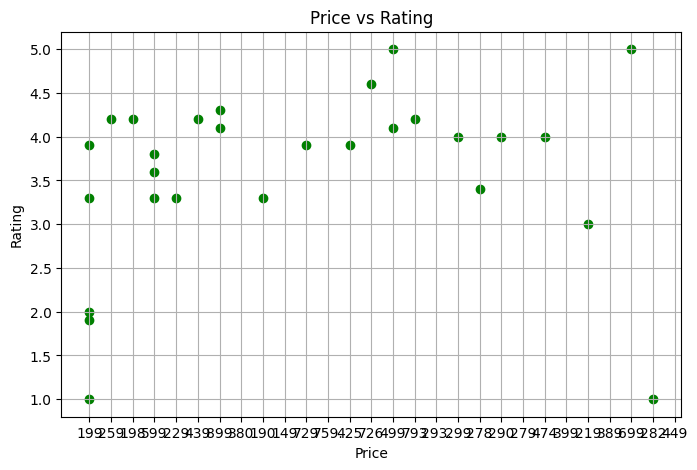

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["Price"], df["Rating"], color='green')
plt.title("Price vs Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

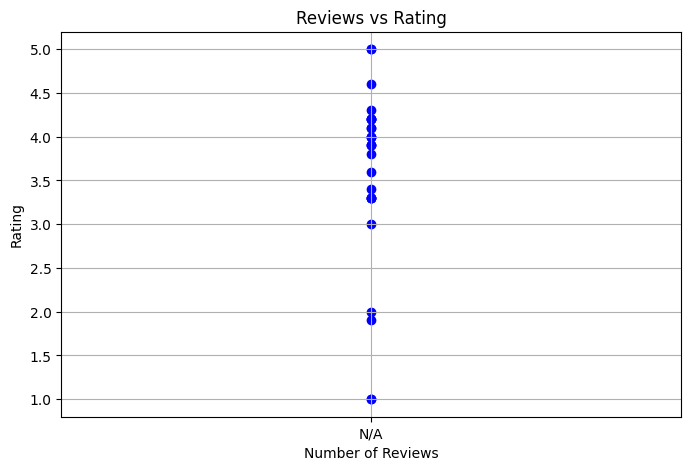

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(df["Reviews"], df["Rating"], color='blue')
plt.title("Reviews vs Rating")
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

In [27]:
df.to_csv("amazon_softtoys_analysis.csv", index=False)